In [69]:
import numpy as np
import pandas as pd
import os
from pymatgen import Structure
import pandas as pd
from pymatgen.analysis.local_env import VoronoiNN
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.structure import (DensityFeatures,SiteStatsFingerprint,GlobalSymmetryFeatures, StructuralHeterogeneity, StructureComposition,PartialRadialDistributionFunction)
from matminer.featurizers.composition import *
from matminer.featurizers.conversions import StrToComposition,CompositionToOxidComposition
from matminer.featurizers.site import *
from matminer.featurizers.function import FunctionFeaturizer

df = pd.read_csv('/Users/lihuachen/Documents/sync/thermal_conduct/matminer/Expt/expt-inorganic-k.csv')
#df['structure'] = 'default value'
path='/Users/lihuachen/Documents/sync/thermal_conduct/matminer/Expt/'
#ID=df.ID
#n=(len(df.ID))
#for i in range(n):
#    structures = Structure.from_file('/Users/lihuachen/Documents/sync/thermal_conduct/matminer/binary-POSCAR/'+str(df.ID[i])+'.cif')
#    df['structure'][i]=structures

## Apply a composition featurizer
df = StrToComposition().featurize_dataframe(df, "formular")
df.head()

,ID,spacegroup,formular,Exptk,logk,composition
0,AgBr,225,AgBr,1.1,0.041393,"(Ag, Br)"
1,AgCl,225,AgCl,1.0,0.000000,"(Ag, Cl)"
2,AlAs,216,AlAs,98.0,1.991226,"(Al, As)"
3,AlP,216,AlP,90.0,1.954243,"(Al, P)"
4,BaO,225,BaO,2.3,0.361728,"(Ba, O)"


In [70]:


epdescriptors = ["X", "row", "group", "block", "atomic_mass", "atomic_radius", "mendeleev_no", "velocity_of_sound",
                        "thermal_conductivity", "melting_point",  "bulk_modulus",
                        "coefficient_of_linear_thermal_expansion"]
magpifeatures=["GSvolume_pa","CovalentRadius","AtomicWeight"]
demlfeatures = ["atom_num",  "heat_fusion","molar_vol",
                        "boiling_point", "heat_cap",
                        "first_ioniz"]
stats = ["mean","minimum", "maximum"]
#statsbondlength=['holder_mean::%d' % d for d in range(-4, 4 + 1)]
featurizer = MultipleFeaturizer([
#    SiteStatsFingerprint(CoordinationNumber(nn=VoronoiNN(weight='area'),use_weights="effective"),stats=stats),
#    SiteStatsFingerprint(GeneralizedRadialDistributionFunction.from_preset('gaussian')),
#    SiteStatsFingerprint(AngularFourierSeries.from_preset('gaussian')),
#    SiteStatsFingerprint(AverageBondLength(VoronoiNN()),stats=stats),
#    SiteStatsFingerprint(AverageBondAngle(VoronoiNN()),stats=stats),
#    SiteStatsFingerprint(AGNIFingerprints()),
#    DensityFeatures(),
#    GlobalSymmetryFeatures("spacegroup_num"),
    ValenceOrbital(props=['avg']),
    ElementProperty(data_source = "pymatgen",features=epdescriptors, stats=stats),
    ElementProperty(data_source = "magpie",features=magpifeatures, stats=stats),
    ElementProperty(data_source = "deml",features=demlfeatures, stats=stats)                       
#    StructureComposition(ElectronAffinity()),
])                                                   

df = featurizer.featurize_dataframe(df,'composition')


In [71]:
#print('Total number of features:', len(featurizer.featurize(df['structure'][0])))
#print('Number of sites in structure:', len(df['structure'][0]))
print("There are {} possible descriptors:\n\n{}".format(df.shape[1], df.columns.values))


There are 73 possible descriptors:

['ID' 'spacegroup' 'formular' 'Exptk' 'logk' 'composition'
 'avg s valence electrons' 'avg p valence electrons'
 'avg d valence electrons' 'avg f valence electrons' 'PymatgenData mean X'
 'PymatgenData minimum X' 'PymatgenData maximum X' 'PymatgenData mean row'
 'PymatgenData minimum row' 'PymatgenData maximum row'
 'PymatgenData mean group' 'PymatgenData minimum group'
 'PymatgenData maximum group' 'PymatgenData mean block'
 'PymatgenData minimum block' 'PymatgenData maximum block'
 'PymatgenData mean atomic_mass' 'PymatgenData minimum atomic_mass'
 'PymatgenData maximum atomic_mass' 'PymatgenData mean atomic_radius'
 'PymatgenData minimum atomic_radius' 'PymatgenData maximum atomic_radius'
 'PymatgenData mean mendeleev_no' 'PymatgenData minimum mendeleev_no'
 'PymatgenData maximum mendeleev_no' 'PymatgenData mean velocity_of_sound'
 'PymatgenData minimum velocity_of_sound'
 'PymatgenData maximum velocity_of_sound'
 'PymatgenData mean thermal_conduc

In [72]:
df=df.dropna(axis=1, how='any')
print("There are {} possible descriptors:\n\n{}".format(df.shape[1], df.columns.values))

There are 58 possible descriptors:

['ID' 'spacegroup' 'formular' 'Exptk' 'logk' 'composition'
 'avg s valence electrons' 'avg p valence electrons'
 'avg d valence electrons' 'avg f valence electrons' 'PymatgenData mean X'
 'PymatgenData minimum X' 'PymatgenData maximum X' 'PymatgenData mean row'
 'PymatgenData minimum row' 'PymatgenData maximum row'
 'PymatgenData mean group' 'PymatgenData minimum group'
 'PymatgenData maximum group' 'PymatgenData mean block'
 'PymatgenData minimum block' 'PymatgenData maximum block'
 'PymatgenData mean atomic_mass' 'PymatgenData minimum atomic_mass'
 'PymatgenData maximum atomic_mass' 'PymatgenData mean atomic_radius'
 'PymatgenData minimum atomic_radius' 'PymatgenData maximum atomic_radius'
 'PymatgenData mean mendeleev_no' 'PymatgenData minimum mendeleev_no'
 'PymatgenData maximum mendeleev_no'
 'PymatgenData mean thermal_conductivity'
 'PymatgenData minimum thermal_conductivity'
 'PymatgenData maximum thermal_conductivity'
 'PymatgenData mean melt

In [73]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head()

,id,spacegroup,formular,exptk,logk,composition,avg_s_valence_electrons,avg_p_valence_electrons,avg_d_valence_electrons,avg_f_valence_electrons,...,demldata_maximum_atom_num,demldata_mean_molar_vol,demldata_minimum_molar_vol,demldata_maximum_molar_vol,demldata_mean_boiling_point,demldata_minimum_boiling_point,demldata_maximum_boiling_point,demldata_mean_first_ioniz,demldata_minimum_first_ioniz,demldata_maximum_first_ioniz
0,AgBr,225,AgBr,1.1,0.041393,"(Ag, Br)",1.5,2.5,10.0,0.0,...,47,15.025,10.27,19.78,1383.500,332.00,2435,935450.0,731000,1139900
1,AgCl,225,AgCl,1.0,0.000000,"(Ag, Cl)",1.5,2.5,5.0,0.0,...,47,13.830,10.27,17.39,1337.055,239.11,2435,991100.0,731000,1251200
2,AlAs,216,AlAs,98.0,1.991226,"(Al, As)",2.0,2.0,5.0,0.0,...,33,11.475,10.00,12.95,1839.500,887.00,2792,762250.0,577500,947000
3,AlP,216,AlP,90.0,1.954243,"(Al, P)",2.0,2.0,0.0,0.0,...,15,13.510,10.00,17.02,1671.000,550.00,2792,794650.0,577500,1011800
4,BaO,225,BaO,2.3,0.361728,"(Ba, O)",2.0,2.0,0.0,0.0,...,56,27.760,17.36,38.16,1116.600,90.20,2143,908400.0,502900,1313900


In [74]:
excluded = ['composition','formular']
df=df.drop(excluded, axis=1)
df.to_csv(path+'ML-k-matminer-primary-combine.csv')
df.head()
df.columns


Index(['id', 'spacegroup', 'exptk', 'logk', 'avg_s_valence_electrons',
       'avg_p_valence_electrons', 'avg_d_valence_electrons',
       'avg_f_valence_electrons', 'pymatgendata_mean_x',
       'pymatgendata_minimum_x', 'pymatgendata_maximum_x',
       'pymatgendata_mean_row', 'pymatgendata_minimum_row',
       'pymatgendata_maximum_row', 'pymatgendata_mean_group',
       'pymatgendata_minimum_group', 'pymatgendata_maximum_group',
       'pymatgendata_mean_block', 'pymatgendata_minimum_block',
       'pymatgendata_maximum_block', 'pymatgendata_mean_atomic_mass',
       'pymatgendata_minimum_atomic_mass', 'pymatgendata_maximum_atomic_mass',
       'pymatgendata_mean_atomic_radius', 'pymatgendata_minimum_atomic_radius',
       'pymatgendata_maximum_atomic_radius', 'pymatgendata_mean_mendeleev_no',
       'pymatgendata_minimum_mendeleev_no',
       'pymatgendata_maximum_mendeleev_no',
       'pymatgendata_mean_thermal_conductivity',
       'pymatgendata_minimum_thermal_conductivity',
  

In [75]:
y = df['logk'].values
excluded = ['id', 'exptk','logk']
X = df.drop(excluded, axis=1)
#X[X==np.inf]=np.nan
#X=X.fillna(X.mean())
#np.isnan(X).any()
#X=X.dropna(inplace=True)

In [76]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

forest = ExtraTreesRegressor(n_estimators=100)
regr=forest.fit(X,y)
importances = forest.feature_importances_


In [77]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print (indices)
# Print the feature ranking
print("Feature ranking:")

[ 2 13 22 37 20 10  8 19 45 38 35 12 43 41 32  0  1 40 23 24 17 46 25 16
 51 28 33 26  6 18  5 49 44 34  7 39 50 42 48 11 29 47 27  3 31 14 30 21
 52 36  9 15  4]
Feature ranking:


1. feature 2 (0.106110)
2. feature 13 (0.085258)
3. feature 22 (0.079999)
4. feature 37 (0.067340)
5. feature 20 (0.040963)
6. feature 10 (0.032282)
7. feature 8 (0.030452)
8. feature 19 (0.030282)
9. feature 45 (0.029684)
10. feature 38 (0.027938)
11. feature 35 (0.026447)
12. feature 12 (0.024625)
13. feature 43 (0.024108)
14. feature 41 (0.022752)
15. feature 32 (0.022492)
16. feature 0 (0.022212)
17. feature 1 (0.021799)
18. feature 40 (0.021234)
19. feature 23 (0.018628)
20. feature 24 (0.018481)
21. feature 17 (0.016828)
22. feature 46 (0.015796)
23. feature 25 (0.014439)
24. feature 16 (0.012574)
25. feature 51 (0.011556)
26. feature 28 (0.010986)
27. feature 33 (0.009753)
28. feature 26 (0.009733)
29. feature 6 (0.009674)
30. feature 18 (0.009306)
31. feature 5 (0.008622)
32. feature 49 (0.008262)
33. feature 44 (0.008118)
34. feature 34 (0.008066)
35. feature 7 (0.007767)
36. feature 39 (0.007282)
37. feature 50 (0.007104)
38. feature 42 (0.006705)
39. feature 48 (0.006683)
40

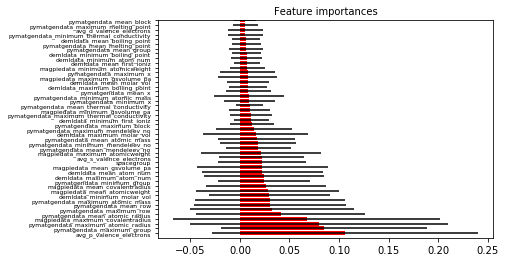

In [78]:
import matplotlib.pyplot as plt  
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]],))

# Plot the feature importances of the forest

plt.figure()
plt.title("Feature importances",fontsize=10)
plt.barh(range(X.shape[1]),importances[indices],
       color="r", xerr=std[indices], align="center")
plt.yticks(range(X.shape[1]), X.columns[indices],fontsize=6)
plt.ylim([-1, 45])
print (X.shape[1])
plt.savefig(path+'featureimportances-newmorefeature-level1.pdf',bbox_inches="tight",format='pdf')
plt.show()



In [79]:
RandomF=X[X.columns[indices]]
RandomF['exptk']=df['exptk']
RandomF['logk']=df['logk']

RandomF.to_csv(path+'ML-k-matminer-RandomF.csv')

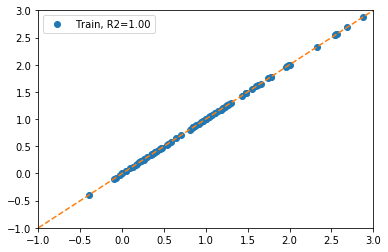

In [80]:
regry_train=regr.predict(X)

train_score=regr.score(X, y)
plt.plot(y,regry_train,'o',label='Train, R2=%1.2f' %train_score)

plt.legend()
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.plot([-1,3],[-1,3],'--')

In [81]:
#LASSO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)


/Users/lihuachen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/Users/lihuachen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/Users/lihuachen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/Users/lihuachen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the numb

0.01 -1.4687673668586698 35
Index(['spacegroup', 'avg_p_valence_electrons', 'avg_d_valence_electrons',
       'pymatgendata_maximum_row', 'pymatgendata_mean_group',
       'pymatgendata_minimum_group', 'pymatgendata_maximum_group',
       'pymatgendata_minimum_atomic_mass', 'pymatgendata_maximum_atomic_mass',
       'pymatgendata_minimum_mendeleev_no',
       'pymatgendata_maximum_mendeleev_no',
       'pymatgendata_mean_thermal_conductivity',
       'pymatgendata_minimum_thermal_conductivity',
       'pymatgendata_maximum_thermal_conductivity',
       'pymatgendata_mean_melting_point', 'pymatgendata_minimum_melting_point',
       'pymatgendata_maximum_melting_point', 'magpiedata_minimum_gsvolume_pa',
       'magpiedata_maximum_gsvolume_pa', 'magpiedata_mean_covalentradius',
       'magpiedata_minimum_covalentradius',
       'magpiedata_maximum_covalentradius', 'magpiedata_mean_atomicweight',
       'magpiedata_minimum_atomicweight', 'magpiedata_maximum_atomicweight',
       'demldata_

/Users/lihuachen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/Users/lihuachen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/Users/lihuachen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.

/Users/lihuachen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the numb

CV 0.6831172212263464 17
Index(['spacegroup', 'pymatgendata_minimum_atomic_mass',
       'pymatgendata_maximum_atomic_mass', 'pymatgendata_minimum_mendeleev_no',
       'pymatgendata_mean_thermal_conductivity',
       'pymatgendata_maximum_thermal_conductivity',
       'pymatgendata_mean_melting_point', 'pymatgendata_minimum_melting_point',
       'pymatgendata_maximum_melting_point',
       'magpiedata_maximum_covalentradius', 'magpiedata_minimum_atomicweight',
       'magpiedata_maximum_atomicweight', 'demldata_minimum_boiling_point',
       'demldata_maximum_boiling_point', 'demldata_mean_first_ioniz',
       'demldata_minimum_first_ioniz', 'demldata_maximum_first_ioniz'],
      dtype='object')


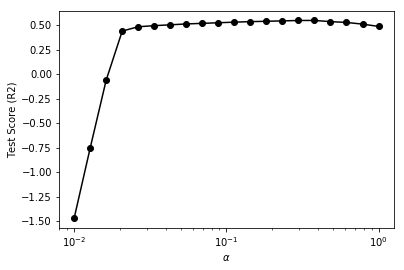

In [83]:
alphas = np.logspace(-2, 0, 20)
scores = np.empty_like(alphas)
for i,a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a,scores[i], np.sum(lasso.coef_!=0))
    feature=np.where(lasso.coef_!=0)
    featurenames=X.columns[feature]
    print (featurenames)
best_alpha=alphas[np.argmax(scores)] 


lassocv = LassoCV(cv=5,alphas=alphas)
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv_score,np.sum(lassocv.coef_!=0))    
featurecv=np.where(lassocv.coef_!=0)
featurenamescv=X.columns[featurecv]
print (featurenamescv)
predictvalues=lassocv.predict(X)

#plt.plot(y,predictvalues,'o')
#plt.xlim(-3,3)
#plt.ylim(-3,3)
#plt.plot([-3,3],[-3,3],'--')
plt.plot(alphas, scores, '-ko')
#plt.plot(lassocv_alpha,lassocv_score, '*')
plt.xlabel(r'$\alpha$')
plt.ylabel('Test Score (R2)')
plt.xscale('log')
plt.savefig(path+'lasso.scorevs.pdf',format='pdf')

/Users/lihuachen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



training score: 0.717003893998226
test score:  0.5481308304939914
number of features used:  19
Index(['spacegroup', 'pymatgendata_minimum_atomic_mass',
       'pymatgendata_maximum_atomic_mass', 'pymatgendata_minimum_mendeleev_no',
       'pymatgendata_mean_thermal_conductivity',
       'pymatgendata_minimum_thermal_conductivity',
       'pymatgendata_maximum_thermal_conductivity',
       'pymatgendata_mean_melting_point', 'pymatgendata_minimum_melting_point',
       'pymatgendata_maximum_melting_point', 'magpiedata_mean_covalentradius',
       'magpiedata_minimum_atomicweight', 'magpiedata_maximum_atomicweight',
       'demldata_mean_boiling_point', 'demldata_minimum_boiling_point',
       'demldata_maximum_boiling_point', 'demldata_mean_first_ioniz',
       'demldata_minimum_first_ioniz', 'demldata_maximum_first_ioniz'],
      dtype='object')


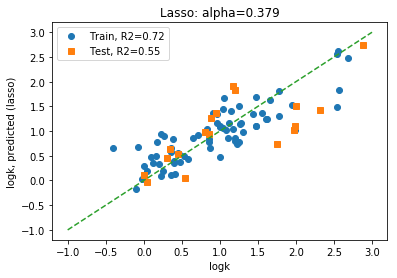

In [84]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
predictvaluestrain=lasso.predict(X_train)
predictvaluestest=lasso.predict(X_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
#names = X.columns
#lasso_coef = lasso.coef_
#plt.plot(range(len(names)), lasso_coef,'o')
#plt.xticks(range(len(names)), names, rotation=90)
#plt.ylabel('Coefficients')
feature=np.where(lasso.coef_!=0)
featurenames=X.columns[feature]
print (featurenames)
plt.plot(y_train,predictvaluestrain,'o',label='Train, R2=%1.2f' %train_score)
plt.plot(y_test,predictvaluestest,'s',label='Test, R2=%1.2f'%test_score)
plt.legend()
plt.plot([-1,3],[-1,3],'--')
plt.title('Lasso: alpha=%1.3f'%best_alpha)
plt.xlabel('logk')
plt.ylabel('logk, predicted (lasso)')
plt.savefig(path+'lasso.pdf',format='pdf')

In [85]:
lasso=X[featurenames]
lasso['exptk']=df['exptk']
lasso['logk']=df['logk']

lasso.to_csv(path+'ML-k-matminer-LASSO.csv')